### 깃허브 시작하기 참고영상
https://www.youtube.com/watch?v=rhP5pseOJc0

1. cd C:\1git\Seaborn :  로 폴더 이동
2. git add 파일명.확장자명 :  으로 추가하기
3. git commit -m '설명'
4. git push  :  깃허브에 올라감.
    
5. 

# Seaborn이란?

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

* Seaborn은 Python에서 통계 그래픽을 만들기 위한 라이브러리입니다. matplotlib 위에 구축 되며 pandas 데이터 구조 와 밀접하게 통합 됩니다.



Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

* Seaborn은 데이터를 탐색하고 이해할 수 있도록 도와줍니다. 플로팅 기능은 전체 데이터 세트를 포함하는 데이터 프레임 및 배열에서 작동하며 필요한 의미론적 매핑 및 통계 집계를 내부적으로 수행하여 유익한 플롯을 생성합니다. 데이터세트 중심의 선언적 API를 사용하면 플롯을 그리는 방법에 대한 세부 정보가 아니라 플롯의 다양한 요소가 의미하는 바에 집중할 수 있습니다.

#### Seaborn 라이브러리
* seaborn은 플롯을 그리기 위해 matplotlib을 사용한다.다.
* Jupyter나 Python이 아닌 다른 인터페이스를 사용할 경우, 그래프를 보기 위해서는  matplotlib.pyplot.show()를 적어야 한다.  (Jupyter/Python에서는 따로 명령어를 주지 않아도 그래프가 출력됨.)

In [1]:
#Import seaborn
import seaborn as sns

#### 기본테마 적용
* matplotlib rcParam 시스템을 사용한다. (모든 matplotlib에 해당)
* 기본테마 외에도 다른 몇 가지 옵션을 선택하여 바꿀 수 있다.
* matplotlib의 기본값이 마음에 들거나 다른 테마를 선호하는 경우에는 이 단계를 넘긴다.

In [2]:
# Apply the default theme
sns.set_theme()

#### 데이터 불러오기
* sns.load_dataset() 함수를 사용하여 빠르게 접근할 수 있습니다.
* pd.read_csv()로도 데이터를 로드할 수 있습니다.

In [3]:
# Load an example dataset
tips = sns.load_dataset("tips")

#### 시각화하기 
* replot()을 사용하면 matplotlib을 사용할때와 달리 색상 값이나 마커코드 측면에서 속성을 지정할 필요가 없다.
* 선언적 접근방식을 사용
* data와 더불어 x값, y값, col, hue, style만을 속성값으로 지정해주었다.

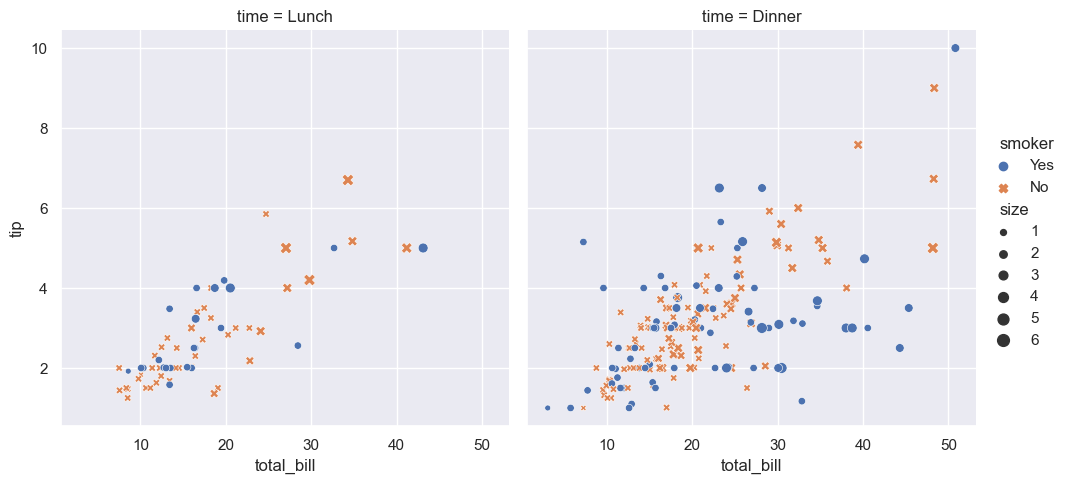

In [4]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

# 통계 그래픽을 위한 고급 API
There is no universally best way to visualize data. Different questions are best answered by different plots. Seaborn makes it easy to switch between different visual representations by using a consistent dataset-oriented API.
* 데이터를 시각화하는 보편적인 최선의 방법은 없습니다. 다른 질문은 다른 플롯에 의해 가장 잘 대답됩니다. Seaborn은 일관된 데이터 세트 지향 API를 사용하여 다양한 시각적 표현 간에 쉽게 전환할 수 있도록 합니다.

#### replot()
* 다양한 통계적 관계를 시각화하도록 설계되었다.
* 산점도가 효과적인 경우가 많지만, 시간측정을 나타내는 관계는 선이 더 잘 표현된다.
* 기본값은 산점도이고, 선으로 바꾸고 싶을 때는 'kind' 매개변수를 사용하면 된다.
* size와 style이 산점도와 선그래프에 사용되는 방식이 달라 유의해야한다.

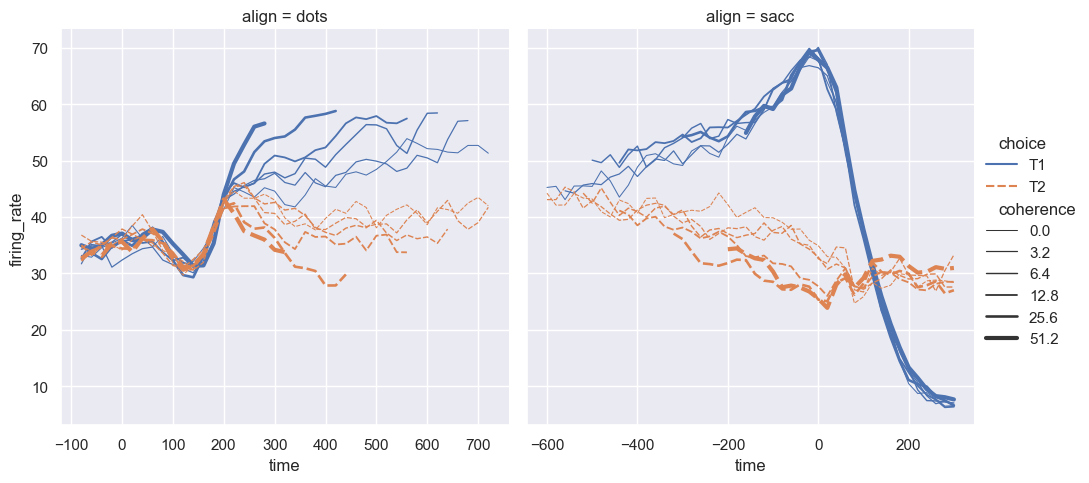

In [5]:
import matplotlib.pyplot as plt

dots = sns.load_dataset("dots")
a = sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)
plt.show(a)

# 통계적 추정

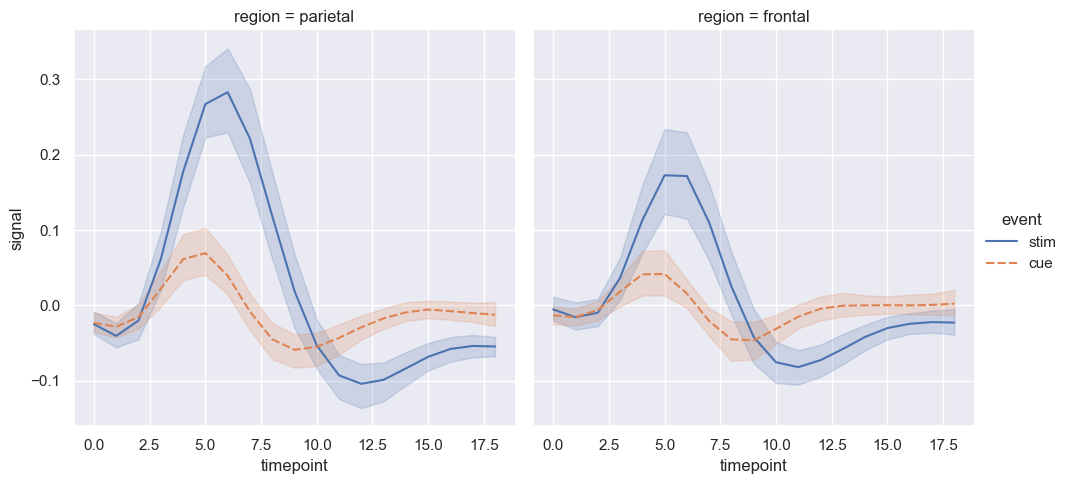

In [6]:
fmri = sns.load_dataset("fmri")
b = sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)
plt.show(b)

* 통계값이 추정되면 seaborn은 부트스트래핑을 사용하여 신뢰구간을 계산하고 오차막대를 그린다.
* seaborn의 통계적 추정은 기술통계를 넘어선다.
* ex) 선형 회귀모델을 포함한 산점도 그리기 : lmplot()

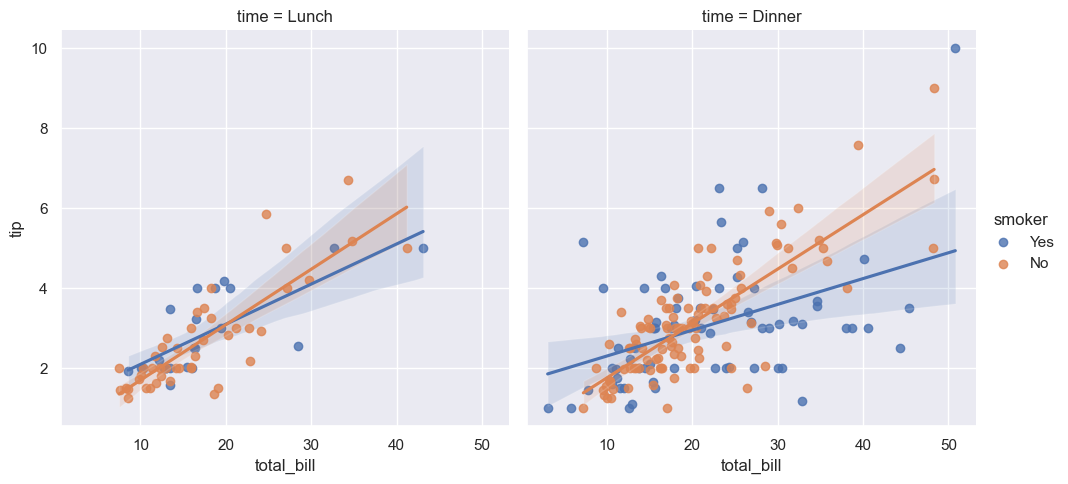

In [9]:
c = sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
plt.show(c)

# 분포표현
* 통계분석에는 데이터셋의 변수분포에 대한 지식이 필요하다.
* seaborn의 함수 displot()은 분포를 시각화하는 여러 접근 방식을 지원한다.
* 여기에는 고전적인 기술(예: 히스토그램)과 계산 집약적 접근방식(커널밀도추정)이 포함된다.

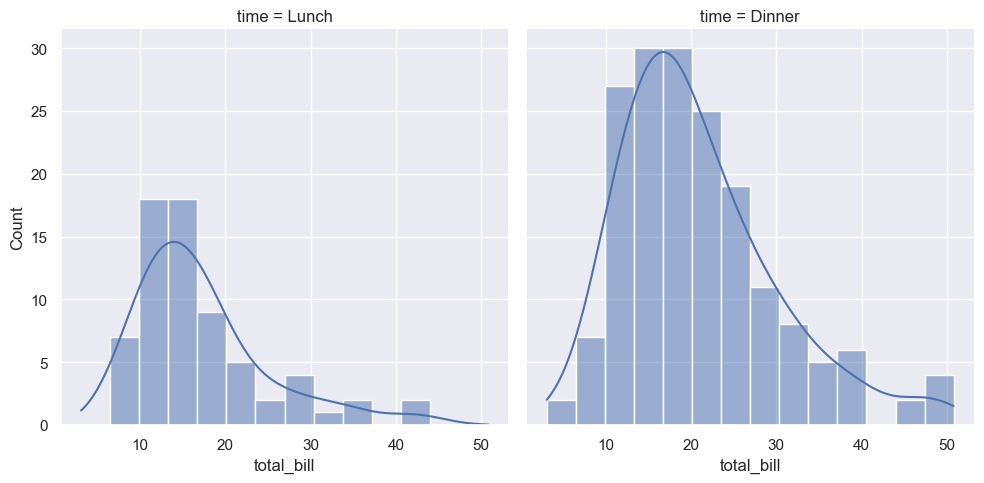

In [12]:
d = sns.displot(data=tips, x="total_bill", col="time", kde=True)
plt.show(d)

* 또, seaborn은 데이터의 누적분포함수를 계산하고 플로팅하는 것과 같이 강력한 기술도 있다.

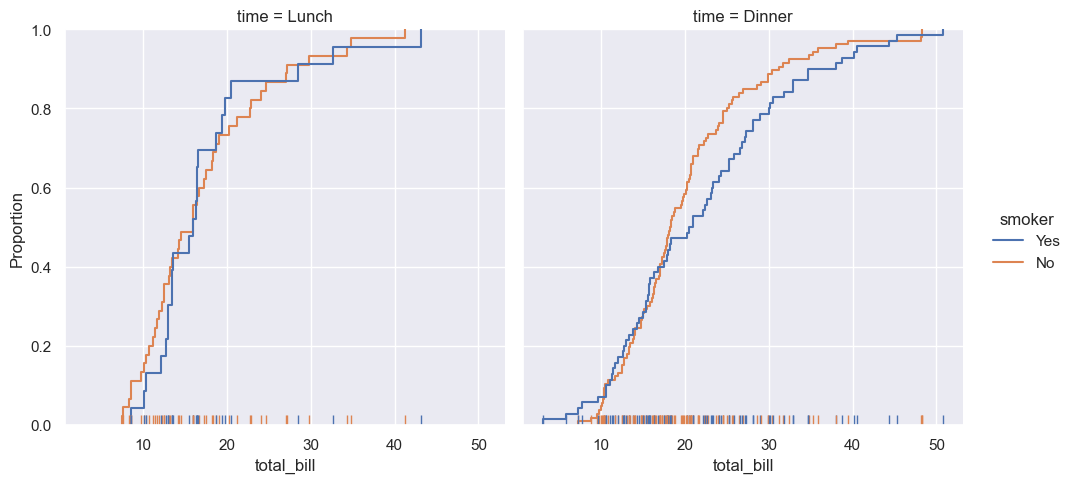

In [15]:
e = sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)
plt.show(e)